# **Small example**

-----------

## **Build the full Score.py**

In [63]:
#%%writefile "{path_to_artifacts}/score.py"

import glob      
import os
import base64
import uuid
import io
import cv2
import numpy as np
from PIL import Image


def rotate_image(image, rotation_degree):
    
    rotated_image = image.rotate(rotation_degree)
    rotated_image.show()
    
    return rotated_image


def im_2_b64(image):
    buff = BytesIO()
    image.save(buff, format="JPEG")
    img_str = base64.b64encode(buff.getvalue())
    return img_str


def load_model():                                   
    class DummyModel:
        def __init__(self):
            pass
    return DummyModel()




def predict(data, model=load_model()):
    
    #########################
    ######################### main - get the image from the json input
    #########################

    input_image = data['data']['input_image_string']
    degree_of_rotation = data['data']['degree_of_rotation']

    #decode base64 to image
    img_bytes_p = io.BytesIO(base64.b64decode(input_image.encode('utf-8')))

    #convert so we can load directly the image without saving
    file_bytes = np.asarray(bytearray(img_bytes_p.read()), dtype=np.uint8)
    imgarr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    final_input_image = Image.fromarray(imgarr)
    final_input_image.show()

    #########################
    ######################### FUNCTION 1 - ROTATING IMAGE
    #########################

    rotated_image = rotate_image(final_input_image, 50)

    
    #########################
    ######################### FUNCTION 2 XXXX 
    #########################
    

    #########################
    ######################### FINAL OUTPUT IMAGE
    #########################

    
    output_image_as_base64 = im_2_b64(rotated_image)
        

    return {'output_image': output_image_as_base64}

## **Create an example payload - Base64 image and degree of rotation of image**

In [64]:
import base64

# set parameters: image and degree of rotation
image_location = "./passport_image.jpg"
degree_of_rotation = 30



#load image
with open(image_location, "rb") as image2string:
    input_image_string = base64.b64encode(image2string.read()).decode('ascii')
    
    
#full example input for endp0oint
data = {'data':{'input_image_string':input_image_string, 'degree_of_rotation':degree_of_rotation}}

## **Invoke the score.py - This would be similar to invoking the actual model as endpoint**

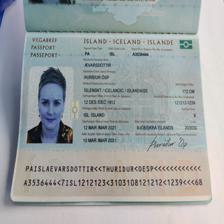

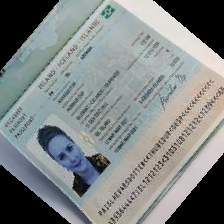

{'output_image': b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADgAOADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5/ooooAKKKKACiinxRSTypFEjSSOwVEQZLE8AAdzQBd0TRb3xBqsOnWEYaaQ8ljhUXuzHsB/9YZJAr3rw/wCH7XwvpSWFuzytvLySt/G5ABOOw4Ax7dzya3gbwbaeF7AXM22TU5l+eUr93/ZX0H6nr

In [71]:
predict(data)